# WebScrapping - Compilateur d'odfres de stages / emplois

## Imports

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%reload_ext autoreload

In [14]:
import bs4
from bs4 import BeautifulSoup
import selenium
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import copy
import streamlit as st
from utils.selenium import element_exists, bypass_captcha, wait_for, hcaptcha_solution
from utils.processing.indeed import enter_indeed_parameters, setup_indeed, pre_login
from utils.login import login_google, login_indeed
from utils.scrapping.indeed import get_job_data
from utils.threading import init_drivers




# code qui marche

## linkedin + glassdoor

In [4]:
d = webdriver.Chrome()
d.get("https://google.com")

In [5]:
poll_rate = 1
current_url = d.current_url
i=0
while d.current_url == current_url:
    if i == 5:
        d.get("https://yahoo.com")
    else:
        time.sleep(poll_rate)
    i+=1
  

In [56]:
#d.get("https://www.glassdoor.fr/Avis/Decathlon-Avis-E41180.htm")
d.get("https://www.glassdoor.fr/Avis")

In [5]:
d.get("https://www.glassdoor.fr/Avis/index.htm")

In [13]:
a = list(map(lambda x: x.text, d.find_element(By.CLASS_NAME, 
            'review-overview__review-overview-module__distributionContainer')\
            .find_elements(By.TAG_NAME, 'p')))
reviews_notes = [a[i] for i in range(0, len(a), 2)]
reviews_tags = [a[i] for i in range(1, len(a), 2)]
list__ = [(j,i) for i,j in zip(reviews_notes,reviews_tags)]
list__

[('35 %', '5 étoiles'),
 ('36 %', '4 étoiles'),
 ('19 %', '3 étoiles'),
 ('6 %', '2 étoiles'),
 ('5 %', '1 étoile')]

In [14]:
company_infos = d.find_element(By.CLASS_NAME, "employer-overview__employer-overview-module__employerDetails")
a = list(map(lambda x: x.text, company_infos.find_elements(By.TAG_NAME, 'li')))
a

['recrutement.decathlon.fr',
 "Villeneuve-d'Ascq, France",
 'De 1 001 à 5 000 employés',
 '9 lieux',
 'Type : Entreprise non cotée en bourse',
 'Fondée en 1976',
 'Revenu : Plus de 10 milliards de dollars US',
 'Magasins de sport']

In [8]:
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
ac = ActionChains(d)
input = d.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
input.send_keys("Decathlon")
sugg = d.find_element(By.CLASS_NAME,"suggestions.down")
while len(comps := sugg.find_elements(By.XPATH,"*")) == 0:
    time.sleep(0.1)
for comp in comps:
    try:
        print(comp.find_element(By.TAG_NAME, "img").get_attribute("src").split("/")[4]) 
    except:
        print("shit company")
    text_ = sugg.get_attribute("innerHTML")
    #bg = ac.move_to_element(comp).key_down(Keys.CONTROL).click(comp).key_up(Keys.CONTROL)
    #print(bg)
    #print(bg.__getattribute__("href"))
    #bg.perform()
    print(comp.text)
#print([comp.text for comp in comps])

41180
Decathlon
shit company
Decathlon Sports Club
shit company
Decathlon Technology
7822762
Decathlon Philippines
4590552
Decathlon Sports Club
7288460
Decathlon Germany
2945610
Decathlon Developers
shit company
Kipstadium


In [9]:
d.find_element(By.CLASS_NAME, 'v2__EIReviewsRatingsStylesV2__ratingInfo').find_element(By.CLASS_NAME,'SVGInline').click()

In [16]:
cs = d.find_elements(By.CLASS_NAME, "fullContent")
cats = cs[0].find_elements(By.CLASS_NAME, "accordion__AccordionStyle__header.categoryRating")
for cat in cats:
    print(cat.text)
#print(cs[0].text)

Globale
★★★★★
3,9
Culture et valeurs
★★★★★
4,1
Diversité et inclusion
★★★★★
4,1
Équilibre travail/vie privée
★★★★★
3,4
Équipe dirigeante
★★★★★
3,4
Rémunération et avantages
★★★★★
3,4
Opportunités de carrière
★★★★★
3,7


In [40]:
ceo = cs[0].find_element(By.CSS_SELECTOR, '[data-accordion-category="ceoRating"]').text
reco = cs[0].find_element(By.CSS_SELECTOR, '[data-accordion-category="recommend"]').text
biz = cs[0].find_element(By.CSS_SELECTOR, '[data-accordion-category="bizOutlook"]').text
print(ceo, reco, biz, sep="\n * \n")

a = cs[0].find_element(By.ID, "DonutRatings").find_elements(By.XPATH, "*")
for aa in a:
    print(aa.text,)

86%
Approuvent le PDG
 * 
79%
Recommandent cette société
 * 
64%
Perspective commerciale positive
79%
Recommandent cette société
86%
Approuvent le PDG
64%
Perspective commerciale positive


In [113]:
d.get("https://www.linkedin.com/jobs/search/?currentJobId=3775969898&keywords=data%20analyst&origin=BLENDED_SEARCH_RESULT_CARD_NAVIGATION&originToLandingJobPostings=3787196808%2C3787300445%2C3787195838")

In [38]:
#class="scaffold-layout__list-container"
#class="ember-view.jobs-search-results__list-item.occludable-update.p0.relative.scaffold-layout__list-item"
from selenium.webdriver.common.action_chains import ActionChains
d = drivers2[0]
a = d.find_element(By.CLASS_NAME, "scaffold-layout__list-container").find_elements(By.XPATH, "*")
print(len(a))
for aa in a:
    hover = ActionChains(d).move_to_element(aa).click()
    hover.perform()
    wait_for(d, By.CLASS_NAME, 'job-view-layout.jobs-details')
    lt = d.find_element(By.CLASS_NAME, 'job-view-layout.jobs-details')
    title = lt.find_element(By.CLASS_NAME,"job-details-jobs-unified-top-card__job-title-link").text
    print(title)
    block = lt.find_element(By.CLASS_NAME,"job-details-jobs-unified-top-card__primary-description-container")
    texts_ = block.find_element(By.CSS_SELECTOR,'div:nth-child(1)').text
    print(texts_)
    company = block.find_element(By.CLASS_NAME,"app-aware-link").text
    try:
        texts = [e.text for e in block.find_elements(By.TAG_NAME,"span")] + [company]
    except:
        texts = "No info"
    for text in texts:
        texts_ = texts_.replace(text.strip(),"")
    texts_ = [x.strip() for x in texts_.strip().split(",")]
    tags = ["Ville", "Région", "Pays"]
    loc_ = dict(zip(tags,texts_))
    text 
    #" ".join([e.text for e in block.find_elements(By.TAG_NAME,"span")])
    print("cc",company, "test",loc_,"fin", text, "prout",sep="\n")
    tt = lt.find_elements(By.CLASS_NAME, "job-details-jobs-unified-top-card__job-insight")
    #for ttt in tt:
    #    try:
    #        print(ttt.text)
    #    except:
    #        print("No text")
    print()

21
Stage qualité data IA Générative
Mirror 404 · France il y a 3 jours · 172 candidats
cc
Mirror 404
test
{'Ville': 'France'}
fin
Mirror 404
prout

Ingénieur(e) DATA - BIG DATA F/H
CGI · Paris, Île-de-France, France Republiée il y a 1 jour · 113 candidats
cc
CGI
test
{'Ville': 'CGI · Pars', 'Région': 'Île-de-Frace', 'Pays': 'Frace Republée l y a 1 jur · 113 caddats'}
fin
o
prout

Consultant Data Analytics H/F
Onepoint · Paris, Île-de-France, France Republiée il y a 1 jour · 533 candidats
cc
Onepoint
test
{'Ville': 'Paris', 'Région': 'Île-de-France', 'Pays': 'France'}
fin
Onepoint
prout

Stage data ingénieur – Database Versioning (H/F) – Paris
Infotel · Paris, Île-de-France, France Republiée il y a 1 jour · 118 candidats
cc
Infotel
test
{'Ville': 'Paris', 'Région': 'Île-de-France', 'Pays': 'France'}
fin
Infotel
prout

Stage Conseil : Consultant(e) en Architecture Data F/H
CGI Business Consulting · Paris, Île-de-France, France Republiée il y a 1 semaine · 80 candidats
cc
CGI Business Con

## Indeed (illegal ;( )

In [19]:
from utils.threading import init_drivers
from utils.processing.indeed import login_indeed_from_scratch
from utils.processing.indeed import long_def
from utils.processing.linkedin import setup_linkedin
from utils.login import login_glassdoor,login_linkedin
from utils.selenium import create_driver
l_email = "severin.lefebure@gmail.com"
l_password= "***"

g_email = "severin.lefebure@edu.devinci.fr"
g_password = "***"
job = "Data Analyst"
city = "Paris"
#5 drivers
#do threads
l_drivers = init_drivers(1,func=setup_linkedin, args=[None, l_email, l_password, False])
g_drivers = init_drivers(3,func=login_glassdoor, args=[None, g_email, g_password, False])
useless_drivers = init_drivers(1, func=create_driver, args=[False])
drivers = l_drivers+g_drivers+useless_drivers
# l_drivers = 0
# g_drivers = 1,2,3
# e_drivers = 4 
print(drivers)

len_driver 1 [[]]
0
range: 1
<ThreadWithReturnValue(Thread-187 (setup_linkedin), initial)>
Creating driver
return None
<selenium.webdriver.chrome.webdriver.WebDriver (session="4fe2e004558c56103e8473f54b28f35e")>
len_driver 1 [[]]
0
range: 3
<ThreadWithReturnValue(Thread-190 (login_glassdoor), initial)>
Creating driver
return None
<ThreadWithReturnValue(Thread-191 (login_glassdoor), initial)>
Creating driver
return None
<ThreadWithReturnValue(Thread-192 (login_glassdoor), initial)>
Creating driver
return None
<selenium.webdriver.chrome.webdriver.WebDriver (session="e9516254caea0c58c607acaf17b52c07")>
<selenium.webdriver.chrome.webdriver.WebDriver (session="dfa1a0163bbd8fe252a60f2aa58799f1")>
<selenium.webdriver.chrome.webdriver.WebDriver (session="fabca9fee692f7137c4bcee30ae92fb7")>
len_driver 1 [[]]
0
range: 1
<ThreadWithReturnValue(Thread-199 (create_driver), initial)>
return None
<selenium.webdriver.chrome.webdriver.WebDriver (session="34ef06388a55dc6de68eaa2dc953602e")>
[[<selenium.

In [20]:
drivers2 = []
for driverss in drivers:
    for driver in driverss:
        drivers2.append(driver)
drivers2

[<selenium.webdriver.chrome.webdriver.WebDriver (session="4fe2e004558c56103e8473f54b28f35e")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="e9516254caea0c58c607acaf17b52c07")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="dfa1a0163bbd8fe252a60f2aa58799f1")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="fabca9fee692f7137c4bcee30ae92fb7")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="34ef06388a55dc6de68eaa2dc953602e")>]

In [12]:
from utils.threading import init_drivers
from utils.processing.indeed import login_indeed_from_scratch
from utils.processing.indeed import long_def
email = "scrapperselenium@gmail.com"
password= "Password123!*"
job = "Data Analyst"
city = "Paris"
#4 drivers
drivers = init_drivers(4,func=login_indeed_from_scratch, args=[email, password, True], nb_pages=1,)
print(drivers)
#drivers[0] = enter_indeed_parameters(drivers[0], job, city)

Exception in thread Thread-130 (login_indeed_from_scratch):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-131 (login_indeed_from_scratch):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
Exception in thread Thread-132 (login_indeed_from_scratch):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scra

len_driver 1 [[]]
0
range: 4
<ThreadWithReturnValue(Thread-130 (login_indeed_from_scratch), initial)>
Creating driver
undetected activated yes !!!!
return None
<ThreadWithReturnValue(Thread-131 (login_indeed_from_scratch), initial)>
Creating driver
undetected activated yes !!!!
return None
<ThreadWithReturnValue(Thread-132 (login_indeed_from_scratch), initial)>
Creating driver
undetected activated yes !!!!
return None
<ThreadWithReturnValue(Thread-133 (login_indeed_from_scratch), initial)>
Creating driver
undetected activated yes !!!!
return None
None
None
None
None
[[None, None, None, None]]


In [22]:
drivers2 = init_drivers(1,func=login_indeed_from_scratch, args=[email, password, False], nb_pages=1)

len_driver 1 [[]]
0
range: 1
<undetected_chromedriver.Chrome (session="d96f8e287b17d04bbf3391090babe727")>
Hello bitch


In [25]:
print(drivers,drivers2)
for driver, driver2 in zip(drivers[0],drivers2[0]):
    driver.get("https://fr.indeed.com/?from=jobsearch-empty-whatwhere")
    driver2.get("https://fr.indeed.com/?from=jobsearch-empty-whatwhere")

[[<undetected_chromedriver.Chrome (session="3f3bdc4e9e2dbe0807f6727682313544")>]] [[<undetected_chromedriver.Chrome (session="d96f8e287b17d04bbf3391090babe727")>]]


In [10]:
import os
import shutil
import tempfile
import undetected_chromedriver as webdriver
def force_patcher_to_use(directory):
    # copy the chromedriver in directory
    exe = webdriver.Patcher.exe_name.replace("%s",".exe")
    #exe = r'C:\Users\sever\AppData\Roaming\undetected_chromedriver\undetected\chromedriver-win32\chromedriver.exe'
    src = os.path.join(webdriver.Patcher.data_path, exe)
    print("exe",exe)
    print("src",src)
    print("dir",directory)
    executable_path = os.path.join(directory, exe)
    print(executable_path)
    shutil.copyfile(src, executable_path)

    # monkey patch the Patcher class
    class PatcherWithForcedExecutablePath(webdriver.Patcher):
        def __init__(self, *args, **kwargs):
            kwargs["executable_path"] = executable_path
            super().__init__(*args, **kwargs)

    webdriver.Patcher = PatcherWithForcedExecutablePath

    return executable_path


if __name__ == "__main__":
    # create a tmp dir where the driver will be put
    tmp_directory = os.path.normpath(tempfile.mkdtemp(dir='C:\\Users\\sever\\AppData\\Roaming\\undetected_chromedriver'))
    executable_path = force_patcher_to_use(tmp_directory)

    driver = webdriver.Chrome(executable_path=executable_path)
 
    # some cleanup when done 
    #driver.quit() 
    #os.remove(executable_path)
    #os.rmdir(tmp_directory)

exe chromedriver.exe
src C:\Users\sever\appdata\roaming\undetected_chromedriver\chromedriver.exe
dir C:\Users\sever\AppData\Roaming\undetected_chromedriver\tmpmd0d6xx_
C:\Users\sever\AppData\Roaming\undetected_chromedriver\tmpmd0d6xx_\chromedriver.exe


In [55]:
from multiprocessing.pool import ThreadPool
from utils.selenium import create_driver
pool = ThreadPool(processes=8)
d = []
t = []
res = []
for i in range(4):
    a = create_driver(undetected=True)
    print("driver", a)
    d.append(a)
for i in d:
    t.append(pool.apply_async(login_indeed_from_scratch, (email, password, True, i))) # tuple of args for foo
for j in t:
    try:
        print(j)
        return_val = j.get() 
        res.append(return_val)
    except:
        res.append('')
print(res)

undetected activated
driver <undetected_chromedriver.Chrome (session="595bc6bcd816695678000ee4e3fbe839")>
undetected activated
driver <undetected_chromedriver.Chrome (session="fe4950512088e3cfe8b2b779cebc0261")>
undetected activated
driver <undetected_chromedriver.Chrome (session="4af3ba97a6d7c254888aca076a9d359a")>
undetected activated
driver <undetected_chromedriver.Chrome (session="cbc1d9485cee4ccc20187f3328d85b43")>
1 <undetected_chromedriver.Chrome (session="595bc6bcd816695678000ee4e3fbe839")>
1 <undetected_chromedriver.Chrome (session="fe4950512088e3cfe8b2b779cebc0261")>
1 <undetected_chromedriver.Chrome (session="4af3ba97a6d7c254888aca076a9d359a")>
1 <undetected_chromedriver.Chrome (session="cbc1d9485cee4ccc20187f3328d85b43")>
2 <undetected_chromedriver.Chrome (session="fe4950512088e3cfe8b2b779cebc0261")>
22 <undetected_chromedriver.Chrome (session="cbc1d9485cee4ccc20187f3328d85b43")>
 <undetected_chromedriver.Chrome (session="4af3ba97a6d7c254888aca076a9d359a")>
2 <undetected_ch

In [58]:
import concurrent.futures
from utils.processing.indeed import long_def
with concurrent.futures.ThreadPoolExecutor() as executor:
    d = []
    t = []
    res = []
    for i in range(4):
        a = create_driver(undetected=True)
        print("driver", a)
        d.append(a)
    for i in d:
        a = executor.submit(long_def,  email, password, True, i,)
        print(a)
        t.append(a)
    for i in t:
        try:
            res.append(i.result())
        except:
            res.append('')
    print(res)

undetected activated
driver <undetected_chromedriver.Chrome (session="b0589f4e4b92a81fd910d24fdbf5bfef")>
undetected activated
driver <undetected_chromedriver.Chrome (session="9f8b69cee0c81544d7b660a0711c1d68")>
undetected activated
driver <undetected_chromedriver.Chrome (session="eb3bfd8e05ed880edafe3f00045d28fd")>
undetected activated
driver <undetected_chromedriver.Chrome (session="99609d8c360b561e786941dc028310f3")>
1 <undetected_chromedriver.Chrome (session="b0589f4e4b92a81fd910d24fdbf5bfef")>
<Future at 0x1deef7ceb60 state=running>
1 <undetected_chromedriver.Chrome (session="9f8b69cee0c81544d7b660a0711c1d68")>
<Future at 0x1deef7cd2d0 state=running>
1 <undetected_chromedriver.Chrome (session="eb3bfd8e05ed880edafe3f00045d28fd")>
<Future at 0x1deef7cd600 state=running>
1 <undetected_chromedriver.Chrome (session="99609d8c360b561e786941dc028310f3")>
<Future at 0x1deef7cd5a0 state=running>
2 <undetected_chromedriver.Chrome (session="b0589f4e4b92a81fd910d24fdbf5bfef")>
2 <undetected_ch

In [12]:
# lance ça

for drivers_list in drivers:
    drivers_list.append(init_drivers()[0][0])
    print(drivers_list[0])
    drivers_list[0] = enter_indeed_parameters(drivers_list[0], job, city)

len_driver 1 [[]]
0
range: 1
<ThreadWithReturnValue(Thread-49 (WebDriver), initial)>
return None
return:  <selenium.webdriver.chrome.webdriver.WebDriver (session="c1299a2c55ca35e31a7bd6f91ae80f85")> None
<selenium.webdriver.chrome.webdriver.WebDriver (session="c1299a2c55ca35e31a7bd6f91ae80f85")>
<undetected_chromedriver.Chrome (session="c8ffc5def788d00809ad4381e4600d38")>


In [15]:
#for drivers_list in drivers:
#    del drivers_list[-1]

In [17]:
drivers

[[<selenium.webdriver.chrome.webdriver.WebDriver (session="b3c432c57e41a46dfd25fdbbfcc66b65")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="1a12bfb417933cad6900334bee90f4bc")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="268ba1047f8df9bf506bf038416163de")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="fa8421f581b16a4f20a58b889a86ea52")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="03f2702105a65c6fbe9d48b94361c080")>],
 [<selenium.webdriver.chrome.webdriver.WebDriver (session="1470ebd6b79757efd1013a0692bac50e")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="e55a0ca062804aba26461bc762062ae8")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="9914ed35d4c2cb655d7f5d9a7a573b9c")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="e8d691cf730300a9762f23efc54b281a")>,
  <selenium.webdriver.chrome.webdriver.WebDriver (session="68b63ffaa1de31712e71e5aa369407e0")>]]

In [4]:
for driver_list in drivers:
    for driver in driver_list:
        driver.quit()

AttributeError: 'NoneType' object has no attribute 'quit'

In [51]:
drivers2

[<selenium.webdriver.chrome.webdriver.WebDriver (session="b98297dc098fc229f394c91654b857e2")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="5d0759e755fa69564d9fe9cf6f136b78")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="54918f31cad5901847bb7aa0c6aa87b0")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="a3a6cb01037416f2e63a881c37cc195b")>,
 <selenium.webdriver.chrome.webdriver.WebDriver (session="f589d4fe627804b2518ad9503e549224")>]

In [105]:
el = drivers2[-4].find_element(By.TAG_NAME, "iframe")
el.click()

In [84]:
with open("tamere.html", "w", encoding="utf-8") as f:
    f.write(str(drivers2[-4].page_source))

'Renvoi à la ligne automatique\n<!DOCTYPE html>\n<html>\n <head>\n  <title>Security | Glassdoor</title>\n  <meta http-equiv="content-type" content="text/html;charset=utf-8" />\n  <meta name=\'viewport\' content=\'width=device-width, initial-scale=1\'/>\n  <meta name="theme-color" content="#0caa41">\n  <style type="text/css">body,html{background:#fff;font-family:Helvetica Neue,HelveticaNeue,Helvetica,Arial,sans-serif;font-size:16px;margin:0;padding:0}div,h1,h2,h3,h4,h5,h6,p{color:#20262e}.header{-webkit-box-shadow:inset 0 -1px 0 0 #dee0e3;box-shadow:inset 0 -1px 0 0 #dee0e3}.header .center{height:45px}.header .center:before{content:"";height:100%;margin-right:-.25em}.header .center:before,.logo{display:inline-block;vertical-align:middle}.center{margin:0 auto;width:996px}.article,.center{box-sizing:border-box}.article{background-color:#fff;border-radius:3px;box-shadow:0 0 2px #c4c7cc;height:100%;margin:16px 0;max-width:690px;padding:16px}h1{font-size:20px;font-weight:900;line-height:1em;
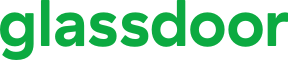

In [89]:
drivers2[-4].get("view-source:"+"https://www.glassdoor.fr/Avis/index.htm")
sourcecode=drivers2[-4].find_element(By.TAG_NAME,'body').text

In [90]:
with open("tamere.html","w") as f:
    f.write(sourcecode)

In [27]:
### Scrap the page data
#drivers = [main_driver, lookup_driver]
from utils.scrapping.linkedin import get_job_data
get_job_data(drivers2, job, city, verbose=True, bypass=True)

get job data
25
**Time of pre-loop Bypass :**  0.12584614753723145
New_element
company: Mirror 404
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406280")>
CAPTCHA !!!!!!!!!!!!!!!!!!!!!!!!!!!
scrap job info
job_tags ['À distance Stage / Alternance', '1-10 employés', 'Compétences : Intelligence artificielle (IA), IA générative et 3 en plus', 'Découvrez comment vous vous positionnez par rapport à 19 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 2.3307230472564697
TOO EARLY
no captcha found


Exception in thread Thread-414 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 43.51457405090332
New_element
company: delaware France
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406281")>
scrap job info
job_tags []
----> Time of eco_score 2.1287593841552734


Exception in thread Thread-417 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 54.17932343482971
New_element
company: Sia Partners
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406282")>
scrap job info
job_tags ['Sur site Stage / Alternance Stagiaire / Alternant', '1 001-5 000 employés · Services et conseil aux entreprises', '1 ancien collègue travaille ici · 9 anciens élèves travaillent ici', 'Compétences : Gestion des données, Gouvernance informatique et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 61 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.9168238639831543


Exception in thread Thread-420 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 64.79784536361694
New_element
company: EY
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406283")>
scrap job info
job_tags ['Sur site Temps plein Manager', '+ de 10 000 employés · Services et conseil en informatique', '16 anciens élèves travaillent ici', 'Compétences : Analytique, Gestion des données et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 24 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.6879398822784424


Exception in thread Thread-423 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 75.37057662010193
New_element
company: mc2i
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406284")>
scrap job info
job_tags []
----> Time of eco_score 1.7322003841400146


Exception in thread Thread-426 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 85.97112703323364
New_element
company: Allianz France
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406285")>
scrap job info
job_tags ['Hybride Temps plein Manager', '5 001-10 000 employés · Assurances', '9 anciens élèves travaillent ici', 'Compétences : Gouvernance informatique, Analyse des risques et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 184 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 2.121004819869995


Exception in thread Thread-429 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 96.55698871612549
New_element
company: Talan
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406286")>
scrap job info
job_tags ['Sur site Temps plein Manager', '1 001-5 000 employés · Services et conseil en informatique', '4 anciens élèves travaillent ici', 'Compétences : Gouvernance informatique, Écoles de commerce et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 56 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.7316703796386719


Exception in thread Thread-432 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 107.1409502029419
New_element
company: Talan
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406287")>
scrap job info
job_tags ['Sur site Temps plein Manager', '1 001-5 000 employés · Services et conseil en informatique', '4 anciens élèves travaillent ici', 'Compétences : Dictionnaire de données, Gouvernance informatique et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 19 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.7450017929077148


Exception in thread Thread-435 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 117.66725492477417
New_element
company: Talan
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406288")>
scrap job info
job_tags ['Sur site Temps plein Manager', '1 001-5 000 employés · Services et conseil en informatique', '4 anciens élèves travaillent ici', 'Compétences : Data Analysis Expressions (DAX), Analyses techniques et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 86 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.756105661392212


Exception in thread Thread-438 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 128.24421191215515
New_element
company: Onepoint
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406289")>
scrap job info
job_tags ['Sur site Temps plein Manager', '1 001-5 000 employés · Services et conseil aux entreprises', '12 anciens élèves travaillent ici', '6 compétences sur 10 correspondent à votre profil, vous pourriez bien convenir pour ce poste', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 34 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.8606586456298828


Exception in thread Thread-441 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 138.64267921447754
New_element
company: Allianz France
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406290")>
scrap job info
job_tags []
----> Time of eco_score 2.1316726207733154


Exception in thread Thread-444 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 149.06684279441833
New_element
company: Europcar Mobility Group
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406291")>
scrap job info
job_tags []
----> Time of eco_score 2.376235246658325


Exception in thread Thread-447 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 159.47348737716675
New_element
company: Onepoint
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406292")>
scrap job info
job_tags ['Sur site Temps plein Manager', '1 001-5 000 employés · Services et conseil aux entreprises', '12 anciens élèves travaillent ici', 'Compétences : Produits SAP, SAP HANA et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 135 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.85109543800354


Exception in thread Thread-450 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 169.96257543563843
New_element
company: LesJeudis
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406293")>
scrap job info
job_tags ['Sur site Temps plein Manager', '11-50 employés · Services et conseil en informatique', 'Compétences : Communication, Exigences commerciales et 8 en plus', 'Découvrez comment vous vous positionnez par rapport à 14 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.7733948230743408


Exception in thread Thread-453 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 180.48108172416687
New_element
company: Artefact
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406294")>
scrap job info
job_tags ['Sur site Temps plein Stagiaire / Alternant', '1 001-5 000 employés · Services et conseil aux entreprises', '6 anciens élèves travaillent ici', 'Compétences : Compétences interpersonnelles, Suivi commercial et 8 en plus', 'Découvrez comment vous vous positionnez par rapport à 1 013 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.8018579483032227


Exception in thread Thread-456 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 190.95963048934937
New_element
company: Groupe Caisse des Dépôts
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406295")>
scrap job info
job_tags ['Sur site Travail temporaire', '+ de 10 000 employés · Administration publique', '3 anciens collègues travaillent ici · 3 anciens élèves travaillent ici', 'Compétences : Méthodes agiles, Travail d’équipe et 7 en plus', 'Découvrez comment vous vous positionnez par rapport à 134 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.839287519454956


Exception in thread Thread-459 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 201.4230499267578
New_element
company: Huxley
get company info
<selenium.webdriver.remote.webelement.WebElement (session="4fe2e004558c56103e8473f54b28f35e", element="9048CDD1B53EB6E6E2D8ABDF9B7AED3F_element_406296")>
scrap job info
job_tags ['Sur site Temps plein Premier emploi', '201-500 employés · Recrutement et placement de personnel', 'Compétences : Développement informatique, Bases de données et 8 en plus', 'Consultez les vérifications liées à cette offre d’emploi.\nConsultez les vérifications liées à cette offre d’emploi.\nTout afficher', 'Découvrez comment vous vous positionnez par rapport à 12 candidats. Essai Premium pour 0 EUR']
----> Time of eco_score 1.726318120956421


Exception in thread Thread-462 (get_company_info):
Traceback (most recent call last):
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\threading.py", line 17, in run
    self._return = self._target(*self._args,
  File "c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project\utils\scrapping\glassdoor.py", line 79, in get_company_info
    input_c = search_driver.find_element(By.ID, "companyAutocomplete-companyDiscover-employerSearch")
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 742, in find_element
    return self.execute(Command.FIND_ELEMENT, {"using": by, "value": value})["value"]
  File "c:\Users\sever\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 348

-------> time of append : 212.50117564201355
New_element


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".job-card-container__primary-description"}
  (Session info: chrome=120.0.6099.129); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF734562142+3514994]
	(No symbol) [0x00007FF734180CE2]
	(No symbol) [0x00007FF7340276AA]
	(No symbol) [0x00007FF734071860]
	(No symbol) [0x00007FF73407197C]
	(No symbol) [0x00007FF7340664FC]
	(No symbol) [0x00007FF73409602F]
	(No symbol) [0x00007FF7340663B6]
	(No symbol) [0x00007FF734096490]
	(No symbol) [0x00007FF7340B28F6]
	(No symbol) [0x00007FF734095D93]
	(No symbol) [0x00007FF734064BDC]
	(No symbol) [0x00007FF734065C64]
	GetHandleVerifier [0x00007FF73458E16B+3695259]
	GetHandleVerifier [0x00007FF7345E6737+4057191]
	GetHandleVerifier [0x00007FF7345DE4E3+4023827]
	GetHandleVerifier [0x00007FF7342B04F9+689705]
	(No symbol) [0x00007FF73418C048]
	(No symbol) [0x00007FF734188044]
	(No symbol) [0x00007FF7341881C9]
	(No symbol) [0x00007FF7341788C4]
	BaseThreadInitThunk [0x00007FF86FB7257D+29]
	RtlUserThreadStart [0x00007FF870C6AA58+40]


'<html lang="en-US" class="lang-fr" dir="ltr"><head><title>Un instant…</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><meta http-equiv="refresh" content="375"><script src="/cdn-cgi/challenge-platform/h/g/orchestrate/chl_page/v1?ray=837f59b23fa2d722"></script><script src="https://challenges.cloudflare.com/turnstile/v0/g/74bd6362/api.js?onload=AudPIu1&amp;render=explicit" async="" defer="" crossorigin="anonymous"></script></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><h1 class="zone-name-title h1"><img src="/favicon.ico" class="heading-favicon" alt="Icône pour exemple.com">fr.indeed.com</h1><h2 id="challenge-running" class="h2">Vérification que la connexion au site est sécurisée.</h2><div id="
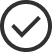

In [8]:
drivers[0][1].page_source

In [ ]:
bypass_captcha(drivers[0][1], method="cloudflare")

NameError: name 'bypass_captcha' is not defined

In [67]:
import pandas as pd
df = pd.read_csv("indeed_jobs.csv")
df = df[df.columns[:]]
#df.head()
df.shape
#df[df.columns[8:20]]
df

,Unnamed: 0,Titre,Entreprise,Lieu,job_id,url_poste,url_company,Compétences,Salaire,Type de poste,...,Score humain,Satisfaction salariale,Unnamed: 16,Salaire et avantages,Direction,Sécurité et évolution,Équilibre vie privée/professionnelle,Culture d'entreprise,Company name eco,Eco score
0,0,Stagiaire Business analyste H/F,Caisse des Dépôts et Consignations,75007 Paris,0a5180cf20d7d92e,https://fr.indeed.com/viewjob?jk=0a5180cf20d7d92e,https://fr.indeed.com/cmp/Caisse-Des-D%C3%A9p%...,"['VBA', 'Tableau', 'SQL']",[],"['Temps plein', 'Alternance']",...,NaN,NaN,NaN,"4,1","3,6","3,5","4,3","3,8",Caisse des Dépôts et Consignations,0
1,1,Business Analyst Data H/F,Nexton Consulting FR,Paris (75),1f126dcc3b4e4c62,https://fr.indeed.com/viewjob?jk=1f126dcc3b4e4c62,https://fr.indeed.com/cmp/Nexton-Consulting-Fr,[],[],['CDI'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nexton Consulting FR,0
2,2,Data Junior Analyst F/M,Candriam,Paris (75),6c326f925434d075,https://fr.indeed.com/viewjob?jk=6c326f925434d075,https://fr.indeed.com/cmp/Candriam,[],[],"['Temps plein', 'Alternance']",...,NaN,NaN,NaN,"3,9","3,8","3,3","4,1","3,6",Candriam,0
3,3,Data Quality Operations Analyst,Shippeo,75010 Paris,8669b27d32724f26,https://fr.indeed.com/viewjob?jk=8669b27d32724f26,https://fr.indeed.com/cmp/Shippeo-1,[],[],['CDI'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shippeo,0
4,4,Stage (6 mois) – Data Analyst Risques F/H – Paris,BPCE SA,Paris (75),1a3083cc6474c747,https://fr.indeed.com/viewjob?jk=1a3083cc6474c747,https://fr.indeed.com/cmp/Groupe-Bpce,"['SQL', 'SAS', 'Power BI']",[],['Stage'],...,NaN,NaN,NaN,"3,2","2,9","3,0","3,5","3,1",BPCE SA,0
5,5,Data Analyst H/F,Harmonie Mutuelle,Paris (75),d0aea174b26116b1,https://fr.indeed.com/viewjob?jk=d0aea174b26116b1,https://fr.indeed.com/cmp/Harmonie-Mutuelle,"['Systèmes wiki', 'SQL', 'SAS']",[],['CDI'],...,NaN,NaN,NaN,"2,9","2,9","2,6","3,5","3,1",Harmonie Mutuelle,1
6,6,Business Analyst - F/H,BPCE SA,Télétravail hybride à Paris (75),4b9ad41308364668,https://fr.indeed.com/viewjob?jk=4b9ad41308364668,https://fr.indeed.com/cmp/Groupe-Bpce,"['SQL', ""Esprit d'analyse"", 'Agile']",[],['CDI'],...,NaN,NaN,NaN,"3,2","2,9","3,0","3,5","3,1",BPCE SA,0
7,7,Operations Data Analyst H/F,DASSAULT SYSTEMES,Vélizy-Villacoublay (78),1e1e8751b6dbe752,https://fr.indeed.com/viewjob?jk=1e1e8751b6dbe752,https://fr.indeed.com/cmp/C--log-2,[],[],['CDI'],...,NaN,NaN,NaN,"3,5","2,5","3,0","4,3","3,0",DASSAULT SYSTEMES,0
8,8,Stage (6 mois) – Data Analyst - Paris,BPCE SA,Paris (75),2cd3f482bbe07be8,https://fr.indeed.com/viewjob?jk=2cd3f482bbe07be8,https://fr.indeed.com/cmp/Groupe-Bpce,"['Visualisation de données', 'SQL', 'SAS']",[],['Stage'],...,NaN,NaN,NaN,"3,2","2,9","3,0","3,5","3,1",BPCE SA,0
9,9,STAGE - Business Analyst / Data Analyst - Suiv...,TotalEnergies,Paris (75),83d18b12f2e6bf1d,https://fr.indeed.com/viewjob?jk=83d18b12f2e6bf1d,https://fr.indeed.com/cmp/Totalenergies,['Power BI'],[],"[""Courte durée jusqu'à 6 mois"", 'Stage']",...,NaN,NaN,NaN,"3,7","3,5","3,5","3,8","3,7",TotalEnergies,0
